In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('multipleChoiceResponses.csv')
df.drop([0],inplace=True)

/sysroot/home/ekaterina/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
df['Time from Start to Finish (seconds)'] = df['Time from Start to Finish (seconds)'].apply(int)

print('N of respondents: ',df.shape[0])
# Rejecting those who answered questions too fast:
df = df[df['Time from Start to Finish (seconds)']>60]
print('N of respondents with time>60 seconds: ',df.shape[0])

N of respondents:  23859
N of respondents with time>60 seconds:  23463


In [17]:
# drop "Time" column
df.drop(['Time from Start to Finish (seconds)'],axis=1,inplace=True)

In [8]:
# SALARY

In [18]:
def rename_some_salaries(salary):
    salary_new=salary
    if (salary!=salary): salary_new='-1'
    elif (salary=='I do not wish to disclose my approximate yearly compensation'): salary_new='secret'
    return salary_new

In [19]:
print('Salary values before renaming:')
print(df['Q9'].unique())
df['Q9']=df['Q9'].apply(lambda x: rename_some_salaries(x))
print('')
print('Salary values after renaming:')
print(df['Q9'].unique())

Salary values before renaming:
[nan '10-20,000' '0-10,000'
 'I do not wish to disclose my approximate yearly compensation'
 '20-30,000' '125-150,000' '30-40,000' '50-60,000' '100-125,000'
 '90-100,000' '70-80,000' '80-90,000' '60-70,000' '400-500,000'
 '40-50,000' '150-200,000' '500,000+' '300-400,000' '200-250,000'
 '250-300,000']

Salary values after renaming:
['-1' '10-20,000' '0-10,000' 'secret' '20-30,000' '125-150,000'
 '30-40,000' '50-60,000' '100-125,000' '90-100,000' '70-80,000'
 '80-90,000' '60-70,000' '400-500,000' '40-50,000' '150-200,000'
 '500,000+' '300-400,000' '200-250,000' '250-300,000']


In [20]:
### !!! ###
# plot how many people didn't disclose their salary, then drop them
### !!! ###

# drop those who didn't disclose disclose their salary
df = df[(df['Q9']!='-1') & (df['Q9']!='secret')]
print(df['Q9'].unique())
print('')
print('N of respondents who disclose their salary: ',df.shape[0])

['10-20,000' '0-10,000' '20-30,000' '125-150,000' '30-40,000' '50-60,000'
 '100-125,000' '90-100,000' '70-80,000' '80-90,000' '60-70,000'
 '400-500,000' '40-50,000' '150-200,000' '500,000+' '300-400,000'
 '200-250,000' '250-300,000']

N of respondents who disclose their salary:  15423


In [64]:
print('N of respondents who claim salary 0-10,000: ',(df[df['Q9']=='0-10,000']).shape[0])

N of respondents who claim salary 0-10,000:  4395


In [23]:
all_salaries = ['0-10,000','10-20,000','20-30,000','30-40,000','40-50,000','50-60,000','60-70,000',
                       '70-80,000','80-90,000','90-100,000','100-125,000','125-150,000','150-200,000',
                       '200-250,000','250-300,000','300-400,000','400-500,000','500,000+']

In [24]:
def order_subset(subset,whole_set):
    ordered = ['']*len(subset)
    i = 0
    for s in whole_set:
        if s in subset:
            ordered[i]=s
            i = i+1
    return ordered

In [25]:
### !!! ###
### testing cell

subset = ['10-20,000','500,000+','0-10,000']
print(order_subset(subset,all_salaries))
subset = []
print(order_subset(subset,all_salaries))
subset = ['hg']
print(order_subset(subset,all_salaries))

['0-10,000', '10-20,000', '500,000+']
[]
['']


In [27]:
df_Tunisia = df[df['Q3']=='Tunisia']

def N_given_percent(df,percent):
    dict_countries = dict(df['Q3'].value_counts())
    N_tot = df.shape[0]
    N_percent = 0
    i = 1
    for key in dict_countries.keys():
        if (key=='Other'): continue
        if (key=='I do not wish to disclose my location'): continue
        print(i, key, dict_countries[key])
        N_percent += dict_countries[key]
        i += 1
        if (N_percent>=percent*N_tot): break

In [48]:
def print_dict(d):
    for key in d:
        print(key,int(d[key]))
        

def ranges_to_numerical(df, col_name='Q9', whole_set = all_salaries):
    subset = df[col_name].unique()
    ordered_subset = order_subset(subset,whole_set)
    dict_ranges = dict(df[col_name].value_counts())
    N_tot = df.shape[0]
    N_values = len(ordered_subset)
    N_values1 = len(dict_ranges)
    if (N_values!=N_values1):
        print('In ranges_to_numerical: (N_values!=N_values1)')
        return
    Ns_given_range = [0]*N_values
    percentile = 0
    ordered_dict = {}
    for key in ordered_subset:
        N_i = dict_ranges[key]
        percentile = percentile+100*N_i/N_tot
        ordered_dict[key] = percentile
    return ordered_dict

def calc_salary_percentile(x, ordered_dict):
    if (x in ordered_dict.keys()):
        return round(ordered_dict[x],3)
    else:
        return -100
    

In [49]:
ordered_dict = ranges_to_numerical(df, col_name='Q9', whole_set = all_salaries)
df['salary_percentile'] = df['Q9'].apply(lambda x: calc_salary_percentile(x,ordered_dict),3)
df['salary_percentile'].head()

2    41.043
3    28.496
5    28.496
7    41.043
8    28.496
Name: salary_percentile, dtype: float64

28.496
100.0


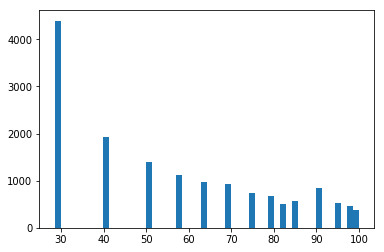

In [76]:

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
plt.hist(df['salary_percentile'],bins=50)

print(df['salary_percentile'].min())
print(df['salary_percentile'].max())

In [54]:
# How many countries have >70% of data scientists making 0-10'000
dict_countries = dict(df['Q3'].value_counts())
i=1
for country in dict_countries.keys():
    ordered_dict = ranges_to_numerical(df[df['Q3']==country], col_name='Q9', whole_set = all_salaries)
    if ('0-10,000') in ordered_dict.keys():
        if (ordered_dict['0-10,000']>=70):
            print(i,country,int(ordered_dict['0-10,000']))
            i+=1

1 Nigeria 78
2 Egypt 72
3 Bangladesh 78
4 Iran, Islamic Republic of... 74
5 Tunisia 74


In [55]:
df.fillna('na_values', inplace=True)

In [65]:
cols_to_check = []
for col in df.columns:
    if (col=='salary_percentile'): continue
    n = len(df[col].unique())
    if (n<100):
        cols_to_check.append(col)
        print(col,n)

Q1 4
Q1_OTHER_TEXT 49
Q2 12
Q3 58
Q4 7
Q5 14
Q6 20
Q7 19
Q8 12
Q9 18
Q10 7
Q11_Part_1 2
Q11_Part_2 2
Q11_Part_3 2
Q11_Part_4 2
Q11_Part_5 2
Q11_Part_6 2
Q11_Part_7 2
Q12_MULTIPLE_CHOICE 7
Q13_Part_1 2
Q13_Part_2 2
Q13_Part_3 2
Q13_Part_4 2
Q13_Part_5 2
Q13_Part_6 2
Q13_Part_7 2
Q13_Part_8 2
Q13_Part_9 2
Q13_Part_10 2
Q13_Part_11 2
Q13_Part_12 2
Q13_Part_13 2
Q13_Part_14 2
Q13_Part_15 2
Q14_Part_1 2
Q14_Part_2 2
Q14_Part_3 2
Q14_Part_4 2
Q14_Part_5 2
Q14_Part_6 2
Q14_Part_7 2
Q14_Part_8 2
Q14_Part_9 2
Q14_Part_10 2
Q14_Part_11 2
Q15_Part_1 2
Q15_Part_2 2
Q15_Part_3 2
Q15_Part_4 2
Q15_Part_5 2
Q15_Part_6 2
Q15_Part_7 2
Q16_Part_1 2
Q16_Part_2 2
Q16_Part_3 2
Q16_Part_4 2
Q16_Part_5 2
Q16_Part_6 2
Q16_Part_7 2
Q16_Part_8 2
Q16_Part_9 2
Q16_Part_10 2
Q16_Part_11 2
Q16_Part_12 2
Q16_Part_13 2
Q16_Part_14 2
Q16_Part_15 2
Q16_Part_16 2
Q16_Part_17 2
Q16_Part_18 2
Q17 18
Q17_OTHER_TEXT 65
Q18 14
Q18_OTHER_TEXT 89
Q19_Part_1 2
Q19_Part_2 2
Q19_Part_3 2
Q19_Part_4 2
Q19_Part_5 2
Q19_Part_6 2
Q19_

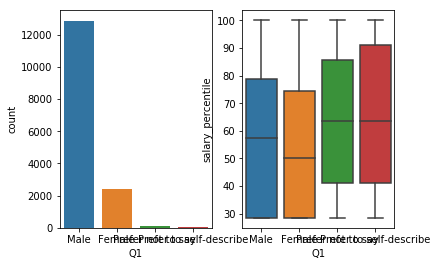

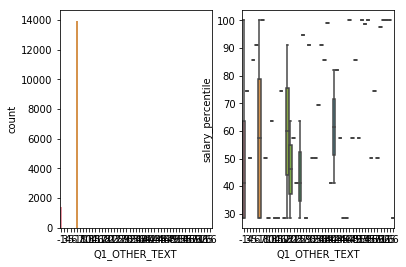

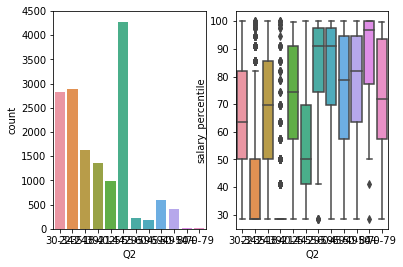

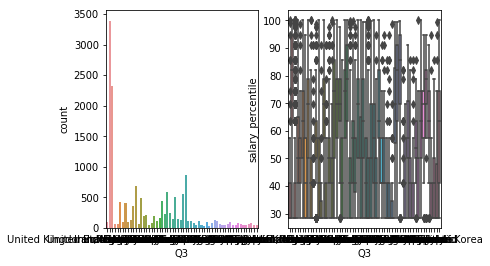

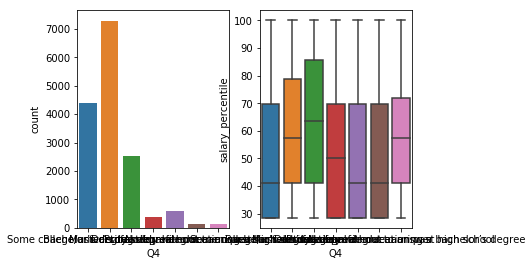

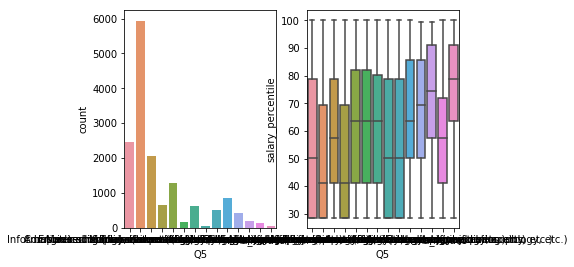

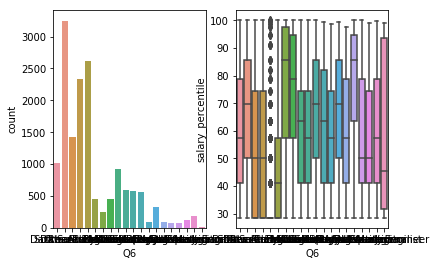

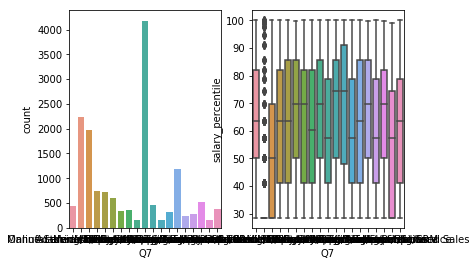

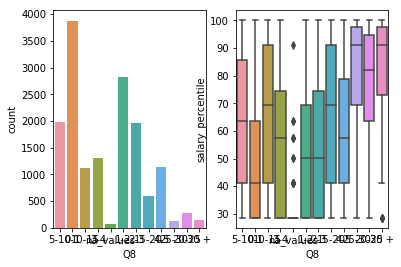

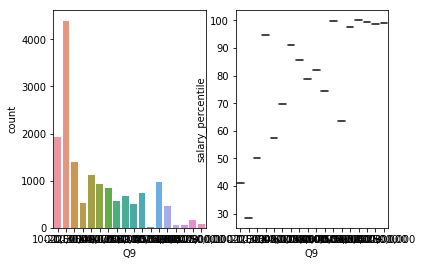

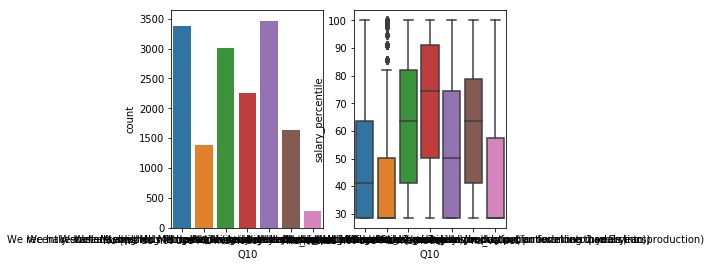

In [68]:
for col in cols_to_check:
    fig, (ax1,ax2) = plt.subplots(ncols=2)
    sns.countplot(x=col,data=df, ax=ax1)
    sns.boxplot(x=col,y='salary_percentile',data=df, ax=ax2)
    if (col=='Q10'): break

In [81]:
# Print all categories with n>10

def print_mean_std_name_n(name,n,mean,std):
    print('{}: count={}, mean={},std={}'.
              format(name,n,int(mean),int(std),int(100*std/mean)))

n_cols = len(cols_to_check)
for i in range(0,n_cols):
    print(cols_to_check[i])
    values = df[cols_to_check[i]].unique()
    print(values)
    n_unique_values = values.size
    for j in range(n_unique_values):
        df_local = df[df[cols_to_check[i]]==values[j]]
        val_mean = df_local['salary_percentile'].mean(axis=0)
        val_std = df_local['salary_percentile'].std(axis=0)
        category=values[j]
        n = df_local.shape[0]
        if (n<10): continue
        val_mean=int(val_mean)
        val_std=int(val_std)
        print_mean_std_name_n(name,n,val_mean,val_std)
    print(' ')

Q1
['Male' 'Female' 'Prefer not to say' 'Prefer to self-describe']
Other: count=12861, mean=56,std=23
Other: count=2379, mean=54,std=23
Other: count=130, mean=62,std=24
Other: count=53, mean=64,std=26
 
Q1_OTHER_TEXT
['-1' '3' '4' '5' '6' -1 7 8 10 13 14 15 16 17 18 20 21 23 25 27 29 30 32
 33 34 36 38 39 40 42 43 44 45 46 47 48 49 51 53 54 55 56 57 59 61 62 11
 65 66]
Other: count=1436, mean=47,std=20
Other: count=13934, mean=57,std=24
 
Q2
['30-34' '22-24' '35-39' '18-21' '40-44' '25-29' '55-59' '60-69' '45-49'
 '50-54' '80+' '70-79']
Other: count=2819, mean=63,std=21
Other: count=2891, mean=42,std=18
Other: count=1637, mean=68,std=21
Other: count=1360, mean=33,std=13
Other: count=989, mean=70,std=21
Other: count=4278, mean=53,std=20
Other: count=222, mean=81,std=18
Other: count=180, mean=81,std=18
Other: count=602, mean=74,std=20
Other: count=403, mean=77,std=20
Other: count=16, mean=83,std=24
Other: count=26, mean=72,std=22
 
Q3
['Indonesia' 'United States of America' 'India' 'Chil

Other: count=3005, mean=60,std=23
Other: count=2255, mean=69,std=23
Other: count=3465, mean=55,std=23
Other: count=1638, mean=60,std=22
Other: count=288, mean=44,std=21
 
Q11_Part_1
['na_values'
 'Analyze and understand data to influence product or business decisions']
Other: count=7960, mean=50,std=22
Other: count=7463, mean=62,std=23
 
Q11_Part_2
['na_values'
 'Build and/or run a machine learning service that operationally improves my product or workflows']
Other: count=11180, mean=54,std=23
Other: count=4243, mean=62,std=24
 
Q11_Part_3
['na_values'
 'Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data']
Other: count=11272, mean=53,std=23
Other: count=4151, mean=63,std=23
 
Q11_Part_4
['na_values'
 'Build prototypes to explore applying machine learning to new areas']
Other: count=9699, mean=51,std=22
Other: count=5724, mean=64,std=23
 
Q11_Part_5
['na_values'
 'Do research that advances the state of the art of machine lear

 
Q18
['Python' 'R' 'SQL' 'Scala' 'Other' 'MATLAB' 'None' 'C++' 'Java' 'SAS'
 'Javascript' 'Go' 'VBA' 'na_values']
Other: count=10279, mean=57,std=23
Other: count=1743, mean=59,std=22
Other: count=711, mean=63,std=22
Other: count=52, mean=63,std=24
Other: count=118, mean=60,std=26
Other: count=165, mean=47,std=21
Other: count=82, mean=56,std=24
Other: count=206, mean=46,std=22
Other: count=114, mean=50,std=23
Other: count=46, mean=61,std=25
Other: count=47, mean=47,std=24
Other: count=17, mean=62,std=20
Other: count=27, mean=57,std=24
Other: count=1816, mean=49,std=23
 
Q18_OTHER_TEXT
['-1' '1' '2' '3' '5' '7' '8' '9' '10' '13' '14' '15' -1 16 17 18 19 21 3
 22 23 24 25 26 8 27 28 29 30 31 34 35 37 38 39 40 43 45 48 49 51 52 53 55
 57 59 61 62 63 67 68 69 70 71 12 72 73 74 75 77 78 79 80 50 81 82 83 85
 86 88 90 91 92 93 94 95 96 98 99 100 101 102 103 105 107 108 109 110 10]
Other: count=1423, mean=47,std=20
Other: count=13882, mean=57,std=23
Other: count=10, mean=45,std=29
Other: coun

Other: count=3218, mean=67,std=23
 
Q27_Part_2
['na_values' 'Google Compute Engine']
Other: count=13670, mean=55,std=23
Other: count=1753, mean=63,std=23
 
Q27_Part_3
['na_values' 'AWS Elastic Beanstalk']
Other: count=14790, mean=56,std=23
Other: count=633, mean=67,std=24
 
Q27_Part_4
['na_values' 'Google App Engine']
Other: count=14358, mean=56,std=23
Other: count=1065, mean=62,std=23
 
Q27_Part_5
['na_values' 'Google Kubernetes Engine']
Other: count=14938, mean=56,std=23
Other: count=485, mean=69,std=23
 
Q27_Part_6
['na_values' 'AWS Lambda']
Other: count=14013, mean=55,std=23
Other: count=1410, mean=68,std=23
 
Q27_Part_7
['na_values' 'Google Cloud Functions']
Other: count=14514, mean=56,std=23
Other: count=909, mean=59,std=24
 
Q27_Part_8
['na_values' 'AWS Batch']
Other: count=15032, mean=56,std=23
Other: count=391, mean=65,std=24
 
Q27_Part_9
['na_values' 'Azure Virtual Machines']
Other: count=14255, mean=55,std=23
Other: count=1168, mean=65,std=22
 
Q27_Part_10
['na_values' 'Azur

Other: count=10570, mean=54,std=23
Other: count=4853, mean=61,std=23
 
Q29_Part_11
['na_values' 'PostgresSQL']
Other: count=12209, mean=53,std=23
Other: count=3214, mean=65,std=22
 
Q29_Part_12
['na_values' 'SQLite']
Other: count=12464, mean=54,std=23
Other: count=2959, mean=63,std=23
 
Q29_Part_13
['na_values' 'Oracle Database']
Other: count=13489, mean=55,std=23
Other: count=1934, mean=63,std=23
 
Q29_Part_14
['na_values' 'Ingres']
Other: count=15378, mean=56,std=23
Other: count=45, mean=71,std=26
 
Q29_Part_15
['na_values' 'Microsoft Access']
Other: count=14360, mean=55,std=23
Other: count=1063, mean=64,std=23
 
Q29_Part_16
['na_values' 'NexusDB']
Other: count=15395, mean=56,std=23
Other: count=28, mean=67,std=22
 
Q29_Part_17
['na_values' 'SAP IQ']
Other: count=15363, mean=56,std=23
Other: count=60, mean=65,std=23
 
Q29_Part_18
['na_values' 'Google Fusion Tables']
Other: count=15326, mean=56,std=23
Other: count=97, mean=68,std=24
 
Q29_Part_19
['na_values' 'Azure Database for MySQL

Other: count=1607, mean=65,std=22
 
Q33_Part_11
['na_values' 'Other']
Other: count=15105, mean=56,std=23
Other: count=318, mean=60,std=23
 
Q34_Part_3
['na_values' '20' '50' '0' '15' '10' '5' '30' '2' '40' '90' '7' '1' '25'
 '3' '60' '8' '35' '18' '22' '27' '4' '26' '12' '16' '80' '45' '99' '6'
 '17' '10.0' '20.0' '5.0' '15.0' '0.0' '25.0' '40.0' '35.0' '30.0' 30.0
 10.0 20.0 15.0 25.0 50.0 5.0 0.0 33.0 40.0 35.0 3.0 8.0 42.0 45.0 1.0 2.0
 60.0 16.0 12.0 18.0 70.0 6.0 22.0 7.0 34.0 43.0 17.0 13.0 90.0 9.0 4.0
 80.0 100.0 14.0 12.5 19.0 11.0 23.0 78.0 55.0 14.286 24.0 75.0 6.25 7.5
 85.0 27.0 26.0 1.8]
Other: count=3658, mean=51,std=23
Other: count=250, mean=46,std=20
Other: count=11, mean=47,std=20
Other: count=79, mean=52,std=21
Other: count=121, mean=47,std=20
Other: count=471, mean=49,std=21
Other: count=201, mean=46,std=18
Other: count=62, mean=47,std=20
Other: count=20, mean=40,std=17
Other: count=38, mean=40,std=16
Other: count=17, mean=54,std=19
Other: count=565, mean=56,std=22


Other: count=631, mean=60,std=24
Other: count=246, mean=56,std=22
Other: count=566, mean=57,std=23
Other: count=453, mean=50,std=21
Other: count=349, mean=59,std=25
Other: count=860, mean=53,std=22
Other: count=76, mean=55,std=21
Other: count=84, mean=55,std=24
Other: count=211, mean=62,std=24
Other: count=17, mean=54,std=28
 
Q38_Part_1
['na_values' 'Twitter']
Other: count=13021, mean=55,std=23
Other: count=2402, mean=59,std=23
 
Q38_Part_2
['na_values' 'Hacker News']
Other: count=13916, mean=55,std=23
Other: count=1507, mean=62,std=24
 
Q38_Part_3
['na_values' 'r/machinelearning']
Other: count=13173, mean=56,std=23
Other: count=2250, mean=58,std=23
 
Q38_Part_4
['na_values' 'Kaggle forums']
Other: count=11454, mean=56,std=23
Other: count=3969, mean=55,std=23
 
Q38_Part_5
['na_values' 'Fastai forums']
Other: count=14835, mean=56,std=23
Other: count=588, mean=60,std=24
 
Q38_Part_6
['na_values' 'Siraj Raval YouTube Channel']
Other: count=14033, mean=57,std=23
Other: count=1390, mean=51

Other: count=1416, mean=58,std=23
Other: count=1134, mean=55,std=23
Other: count=517, mean=58,std=23
Other: count=741, mean=56,std=23
Other: count=856, mean=67,std=23
Other: count=370, mean=62,std=24
Other: count=1531, mean=56,std=23
Other: count=788, mean=56,std=23
Other: count=569, mean=62,std=25
Other: count=502, mean=59,std=23
 
Q47_Part_1
['na_values' 'Examine individual model coefficients']
Other: count=12583, mean=54,std=23
Other: count=2840, mean=65,std=23
 
Q47_Part_2
['na_values' 'Examine feature correlations']
Other: count=11183, mean=54,std=23
Other: count=4240, mean=62,std=23
 
Q47_Part_3
['na_values' 'Examine feature importances']
Other: count=10711, mean=53,std=23
Other: count=4712, mean=63,std=23
 
Q47_Part_4
['na_values' 'Plot decision boundaries']
Other: count=12797, mean=55,std=23
Other: count=2626, mean=59,std=23
 
Q47_Part_5
['na_values' 'Create partial dependence plots']
Other: count=13957, mean=55,std=23
Other: count=1466, mean=62,std=24
 
Q47_Part_6
['na_values'

In [86]:
# Same but a little cleaner

def print_mean_std_name_n(name,n,mean,std):
    print('{}: count={}, mean={},std={}'.
              format(name,n,int(mean),int(std),int(100*std/mean)))

n_cols = len(cols_to_check)
for col in cols_to_check:
    print(col)
    df_col = df[[col,'salary_percentile']]
    categories = df_col[col].unique()
    #print(categories)
    n_cats = categories.size
    for cat in categories:
        df_local = df_col[df_col[col]==cat]
        n = df_local.shape[0]
        if (n<10): continue
        val_mean = df_local['salary_percentile'].mean(axis=0)
        val_std = df_local['salary_percentile'].std(axis=0)
        val_mean=int(val_mean)
        val_std=int(val_std)
        print_mean_std_name_n(cat,n,val_mean,val_std)
    print(' ')

Q1
Male: count=12861, mean=56,std=23
Female: count=2379, mean=54,std=23
Prefer not to say: count=130, mean=62,std=24
Prefer to self-describe: count=53, mean=64,std=26
 
Q1_OTHER_TEXT
-1: count=1436, mean=47,std=20
-1: count=13934, mean=57,std=24
 
Q2
30-34: count=2819, mean=63,std=21
22-24: count=2891, mean=42,std=18
35-39: count=1637, mean=68,std=21
18-21: count=1360, mean=33,std=13
40-44: count=989, mean=70,std=21
25-29: count=4278, mean=53,std=20
55-59: count=222, mean=81,std=18
60-69: count=180, mean=81,std=18
45-49: count=602, mean=74,std=20
50-54: count=403, mean=77,std=20
80+: count=16, mean=83,std=24
70-79: count=26, mean=72,std=22
 
Q3
Indonesia: count=103, mean=36,std=16
United States of America: count=3391, mean=76,std=21
India: count=2320, mean=39,std=16
Chile: count=60, mean=54,std=19
Hungary: count=68, mean=49,std=16
France: count=422, mean=61,std=18
Argentina: count=99, mean=46,std=18
Japan: count=411, mean=63,std=20
Colombia: count=101, mean=44,std=17
Nigeria: count=132

Visual Studio: count=3590, mean=55,std=23
 
Q13_Part_9
na_values: count=9741, mean=56,std=24
Notepad++: count=5682, mean=56,std=23
 
Q13_Part_10
na_values: count=10996, mean=56,std=23
Sublime Text: count=4427, mean=56,std=24
 
Q13_Part_11
na_values: count=12193, mean=55,std=23
Vim: count=3230, mean=61,std=23
 
Q13_Part_12
na_values: count=12902, mean=56,std=23
IntelliJ: count=2521, mean=58,std=24
 
Q13_Part_13
na_values: count=11574, mean=56,std=23
Spyder: count=3849, mean=56,std=23
 
Q13_Part_14
None: count=329, mean=56,std=22
na_values: count=15094, mean=56,std=23
 
Q13_Part_15
na_values: count=14481, mean=56,std=23
Other: count=942, mean=61,std=24
 
Q14_Part_1
na_values: count=11069, mean=56,std=24
Kaggle Kernels: count=4354, mean=55,std=23
 
Q14_Part_2
na_values: count=12860, mean=56,std=23
Google Colab: count=2563, mean=54,std=23
 
Q14_Part_3
na_values: count=14457, mean=56,std=23
Azure Notebook: count=966, mean=59,std=23
 
Q14_Part_4
na_values: count=15324, mean=56,std=23
Domino 

na_values: count=14358, mean=56,std=23
Google App Engine: count=1065, mean=62,std=23
 
Q27_Part_5
na_values: count=14938, mean=56,std=23
Google Kubernetes Engine: count=485, mean=69,std=23
 
Q27_Part_6
na_values: count=14013, mean=55,std=23
AWS Lambda: count=1410, mean=68,std=23
 
Q27_Part_7
na_values: count=14514, mean=56,std=23
Google Cloud Functions: count=909, mean=59,std=24
 
Q27_Part_8
na_values: count=15032, mean=56,std=23
AWS Batch: count=391, mean=65,std=24
 
Q27_Part_9
na_values: count=14255, mean=55,std=23
Azure Virtual Machines: count=1168, mean=65,std=22
 
Q27_Part_10
na_values: count=15059, mean=56,std=23
Azure Container Service: count=364, mean=68,std=23
 
Q27_Part_11
na_values: count=14977, mean=56,std=23
Azure Functions: count=446, mean=64,std=23
 
Q27_Part_12
na_values: count=15329, mean=56,std=23
Azure Event Grid: count=94, mean=66,std=23
 
Q27_Part_13
na_values: count=15242, mean=56,std=23
Azure Batch: count=181, mean=66,std=23
 
Q27_Part_14
na_values: count=15232, 

Google BigQuery: count=1013, mean=68,std=22
 
Q30_Part_11
na_values: count=14925, mean=55,std=23
Teradata: count=498, mean=73,std=21
 
Q30_Part_12
na_values: count=15084, mean=56,std=23
Microsoft Analysis Services: count=339, mean=64,std=23
 
Q30_Part_13
na_values: count=15253, mean=56,std=23
Oracle Exadata: count=170, mean=67,std=23
 
Q30_Part_14
na_values: count=15322, mean=56,std=23
Oracle Warehouse Builder: count=101, mean=61,std=24
 
Q30_Part_15
na_values: count=15375, mean=56,std=23
SAP IQ: count=48, mean=66,std=24
 
Q30_Part_16
na_values: count=15215, mean=56,std=23
Snowflake: count=208, mean=75,std=23
 
Q30_Part_17
na_values: count=14707, mean=55,std=23
Databricks: count=716, mean=72,std=22
 
Q30_Part_18
na_values: count=15194, mean=56,std=23
Azure SQL Data Warehouse: count=229, mean=67,std=23
 
Q30_Part_19
na_values: count=15223, mean=56,std=23
Azure HDInsight: count=200, mean=68,std=24
 
Q30_Part_20
na_values: count=15283, mean=56,std=23
Azure Stream Analytics: count=140, mea

0.0: count=37, mean=53,std=21
0.0: count=9629, mean=59,std=23
20.0: count=87, mean=49,std=21
50.0: count=40, mean=54,std=24
100.0: count=71, mean=57,std=22
25.0: count=25, mean=57,std=22
10.0: count=186, mean=51,std=23
15.0: count=25, mean=47,std=19
40.0: count=30, mean=66,std=22
60.0: count=13, mean=57,std=20
5.0: count=59, mean=52,std=24
70.0: count=16, mean=70,std=21
30.0: count=45, mean=52,std=25
80.0: count=12, mean=61,std=25
 
Q36_Part_1
na_values: count=12577, mean=55,std=23
Udacity: count=2846, mean=59,std=24
 
Q36_Part_2
na_values: count=8528, mean=54,std=23
Coursera: count=6895, mean=59,std=23
 
Q36_Part_3
na_values: count=12659, mean=55,std=23
edX: count=2764, mean=59,std=23
 
Q36_Part_4
na_values: count=12198, mean=56,std=24
DataCamp: count=3225, mean=58,std=22
 
Q36_Part_5
na_values: count=14896, mean=56,std=23
DataQuest: count=527, mean=55,std=22
 
Q36_Part_6
na_values: count=12538, mean=56,std=24
Kaggle Learn: count=2885, mean=54,std=22
 
Q36_Part_7
na_values: count=1419

na_values: count=9582, mean=53,std=23
Plot predicted vs. actual results: count=5841, mean=61,std=23
 
Q47_Part_9
na_values: count=12626, mean=55,std=23
Print out a decision tree: count=2797, mean=61,std=23
 
Q47_Part_10
na_values: count=13024, mean=54,std=23
Sensitivity analysis/perturbation importance: count=2399, mean=65,std=23
 
Q47_Part_11
na_values: count=14667, mean=55,std=23
LIME functions: count=756, mean=68,std=22
 
Q47_Part_12
na_values: count=15011, mean=56,std=23
ELI5 functions: count=412, mean=63,std=23
 
Q47_Part_13
na_values: count=14832, mean=56,std=23
SHAP functions: count=591, mean=66,std=23
 
Q47_Part_14
na_values: count=13976, mean=56,std=23
None/I do not use these model explanation techniques: count=1447, mean=53,std=22
 
Q47_Part_15
na_values: count=15245, mean=56,std=23
Other: count=178, mean=59,std=23
 
Q48
na_values: count=5409, mean=52,std=23
I am confident that I can explain the outputs of most if not all ML models: count=903, mean=60,std=24
I am confident th

In [136]:
def print_mean_std_name_n(name,n,mean,std):
    print('{}: count={}, mean={},std={}'.
              format(name,n,int(mean),int(std),int(100*std/mean)))

def cats_mean_and_std(df_col,n_cut):
    categories = df_col[col].unique()
    n_cats = categories.size
    dict_cats = {}
    for cat in categories:
        df_local = df_col[df_col[col]==cat]
        n = df_local.shape[0]
        if (n<n_cut): continue
        val_mean = df_local['salary_percentile'].mean(axis=0)
        val_std = df_local['salary_percentile'].std(axis=0)
        val_mean=int(val_mean)
        val_std=int(val_std)
        dict_cats[cat] = [val_mean, val_std]
    return dict_cats

def separation(mean1,mean2,std1,std2):
    diff = abs(mean1-mean2)
    std = (std1**2+std2**2)**0.5
    return diff-std

def separations(dict_cats):
    n = len(dict_cats)
    keys = list(dict_cats.keys())
    seps = []
    sep_max = ['key1','key2',-100]
    for i in range(n):
        for j in range(i,n):
            key1 = keys[i]
            key2 = keys[j]
            mean1,std1 = dict_cats[key1]
            mean2,std2 = dict_cats[key2]
            sep = separation(mean1,mean2,std1,std2)
            if (sep>0): seps.append([key1,key2,int(sep)])
            if (sep>sep_max[2]): 
                sep_max[0] = key1
                sep_max[1] = key2
                sep_max[2] = int(sep)
    return sep_max,seps

In [138]:
for col in cols_to_check:
    df_col = df[[col,'salary_percentile']]
    dict_cats = cats_mean_and_std(df_col,n_cut=50)
    sep_max,seps = separations(dict_cats)
    if (len(seps)>0):
        print(col, 'sep max =',sep_max)
        #print(seps)
        #print(' ')

Q2 sep max = ['18-21', '60-69', 25]
Q3 sep max = ['Nigeria', 'Switzerland', 19]
Q6 sep max = ['Student', 'Principal Investigator', 19]
Q7 sep max = ['I am a student', 'Military/Security/Defense', 11]
Q8 sep max = ['na_values', '30 +', 28]
Q9 sep max = ['0-10,000', '500,000+', 72]
Q24 sep max = ['< 1 year', '30-40 years', 16]
Q25 sep max = ['< 1 year', '20+ years', 9]


In [143]:
def print_mean_std_name_n(name,n,mean,std):
    print('{}: count={}, mean={},std={}'.
              format(name,n,int(mean),int(std),int(100*std/mean)))

def cats_mean_and_std(df_col,n_cut):
    categories = df_col[col].unique()
    n_cats = categories.size
    dict_cats = {}
    for cat in categories:
        df_local = df_col[df_col[col]==cat]
        n = df_local.shape[0]
        if (n<n_cut): continue
        val_mean = df_local['salary_percentile'].mean(axis=0)
        val_std = df_local['salary_percentile'].std(axis=0)
        val_mean=int(val_mean)
        val_std=int(val_std)
        dict_cats[cat] = [val_mean, val_std]
    return dict_cats

def separation(mean1,mean2,std1,std2):
    diff = abs(mean1-mean2)
   # std = (std1**2+std2**2)**0.5
    return diff

def separations(dict_cats):
    n = len(dict_cats)
    keys = list(dict_cats.keys())
    seps = []
    sep_max = ['key1','key2',-100]
    for i in range(n):
        for j in range(i,n):
            key1 = keys[i]
            key2 = keys[j]
            mean1,std1 = dict_cats[key1]
            mean2,std2 = dict_cats[key2]
            sep = separation(mean1,mean2,std1,std2)
            if (sep>0): seps.append([key1,key2,int(sep)])
            if (sep>sep_max[2]): 
                sep_max[0] = key1
                sep_max[1] = key2
                sep_max[2] = int(sep)
    return sep_max,seps

for col in cols_to_check:
    df_col = df[[col,'salary_percentile']]
    dict_cats = cats_mean_and_std(df_col,n_cut=50)
    sep_max,seps = separations(dict_cats)
    if (sep_max[2]>30):
        print(col, 'sep max =',sep_max)
        #print(seps)
        #print(' ')

Q2 sep max = ['18-21', '55-59', 48]
Q3 sep max = ['Nigeria', 'Switzerland', 44]
Q6 sep max = ['Student', 'Principal Investigator', 43]
Q7 sep max = ['I am a student', 'Military/Security/Defense', 35]
Q8 sep max = ['na_values', '30 +', 50]
Q9 sep max = ['0-10,000', '500,000+', 72]
Q24 sep max = ['< 1 year', '30-40 years', 42]
Q25 sep max = ['< 1 year', '20+ years', 37]
